# Effect of Player Characteristics on Their Values
## by Doaa Mahmoud Kiwan

## Investigation Overview

> In this investigation, I wanted to look at some characteristics of football players that could be used to determine their values in market. The main focus was on player's age, position, overall score, preferred foot, wage and club.

## Dataset Overview

> The data consisted of values and attributes of approximately 18,200 football players.The attributes included the player's name, age, nationality, club, position, preferred foot, value, wage, in addition to many other attributes describing the player's skills and abilities.

In [54]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [55]:
# load in the dataset into a pandas dataframe
fifa = pd.read_csv('FIFA19.csv', index_col = [0])


In [56]:
# Select some columns to be able to follow up
fifa_sub = fifa[['Age', "Nationality","Club",'Position', "Overall","Value","Wage","Preferred Foot","Height","Weight","Finishing","Penalties","Reactions","Stamina","BallControl","Dribbling"]].copy()


In [57]:
#drop rows with empty entries
fifa_sub.dropna(axis = 0, inplace = True)
fifa_sub.reset_index(drop=True, inplace=True)

In [58]:
#Extract numbers from the Value column and convert them to floats
fifa_sub['Value'].replace({'[€]':'', '.5M':'500000', 'M':'000000', 'K':'000'}, regex=True, inplace=True)
fifa_sub["Value"]=pd.to_numeric(fifa_sub["Value"])/1000
#get rid of rows with value =0
fifa_sub= fifa_sub[fifa_sub["Value"]>0]

In [59]:
#Extract numbers from the Wage column and convert them to floats
fifa_sub["Wage"] = fifa_sub["Wage"].apply(lambda x :x[1:-1])
indx = fifa_sub[fifa_sub["Wage"]==" "].index
fifa_sub.drop(fifa_sub.index[indx], inplace=True)
fifa_sub.reset_index(drop = True, inplace = True)
fifa_sub["Wage"]= pd.to_numeric(fifa_sub["Wage"])

##  Distribution of Player Values


The distribution of the player values is bimodal with one peak around €400k. Another peak, but much shorter than the other one, is around €8M.

In [60]:
#Values of less than 10k are very low so we can consider them as outliers.
fifa_sub = fifa_sub[fifa_sub["Value"]>=10]

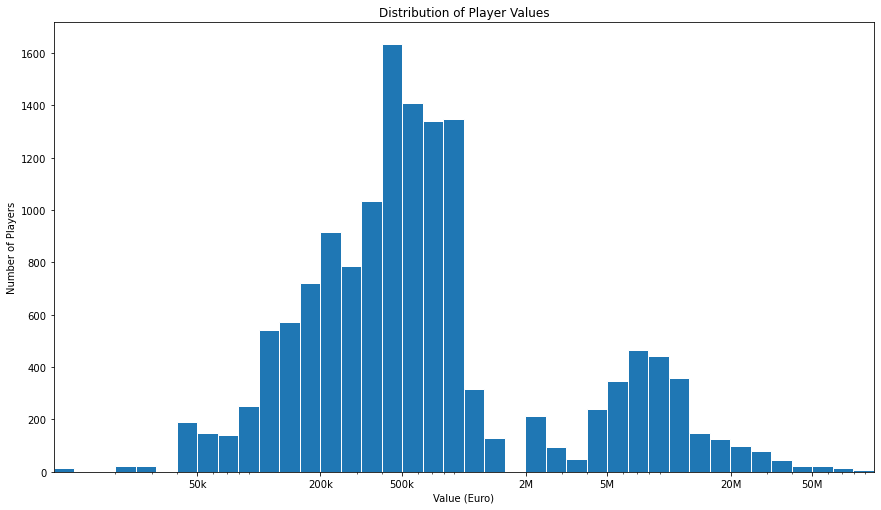

In [61]:
# Distribution of the players values
import matplotlib.ticker as mticker    
bins = 10**np.arange(0, np.log10(fifa_sub["Value"].max())+0.1, 0.1)
plt.figure(figsize=[14.70, 8.27])
plt.hist(fifa_sub["Value"], bins = bins, edgecolor="white")
plt.xlabel("Value (Euro)")
plt.ylabel("Number of Players")
plt.xscale("log")
#plt.xticks([10, 100, 1000, 10000, 100000],['10k', '100k', '1M', '10M', '100M'])
plt.xticks([50,200, 500,2000, 5000,20000, 50000],['50k','200k', '500k','2M', '5M','20M', '50M'])
plt.xlim(10,100000)
plt.title("Distribution of Player Values");

##  Distribution of Player Ages

The distribution of the palyer ages is skewed to the right. Most players are between 20 and 30 years old. There very few players older than 40 years old.

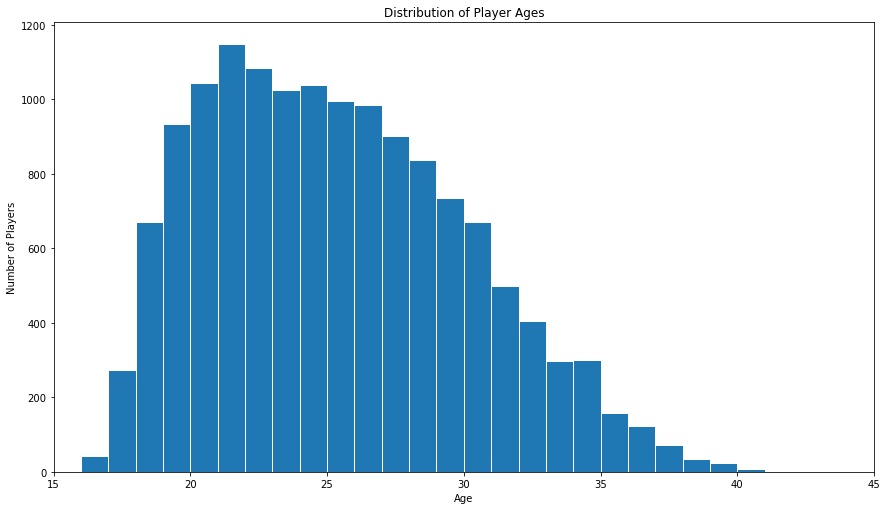

In [62]:
# Distribution of the player ages
bins = np.arange(0, fifa_sub["Age"].max()+1, 1)
plt.figure(figsize=[14.70, 8.27])
plt.hist(fifa_sub["Age"], bins = bins, edgecolor="white")
plt.xlabel("Age")
plt.ylabel("Number of Players")
plt.xticks([0,5,10,15,20,25,30,35,40,45],[0,5,10,15,20,25,30,35,40,45])
plt.xlim(15,45)
plt.title("Distribution of Player Ages");

##  Distribution of Player Overall Score

The distribution of the Overall score of the players is bimodal with a peak at around 65 and another peak around 75. Few players have an overall score that is less than 50 or more than 85.


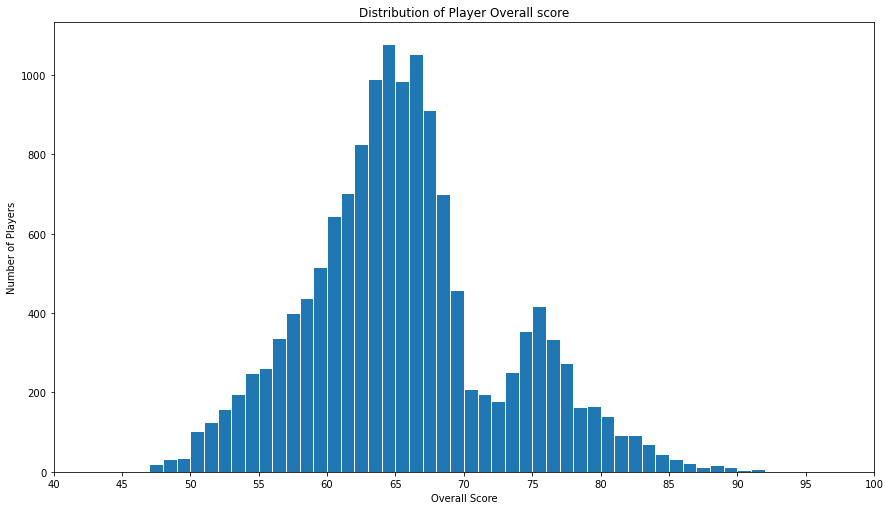

In [63]:
# Distribution of the player overall scores
bins = np.arange(0, fifa_sub["Overall"].max()+1, 1)
plt.figure(figsize=[14.70, 8.27])
plt.hist(fifa_sub["Overall"], bins = bins, edgecolor="white")
plt.xlabel("Overall Score")
plt.ylabel("Number of Players")
plt.xlim(40,100)
plt.xticks(np.arange(40,100+5,5),np.arange(40,100+5,5))
plt.title("Distribution of Player Overall score");

##  Distribution of Player Preferred Foot

The distribution shows that 77% of players are rightfooted while only 23% of the palyers are leftfooted.

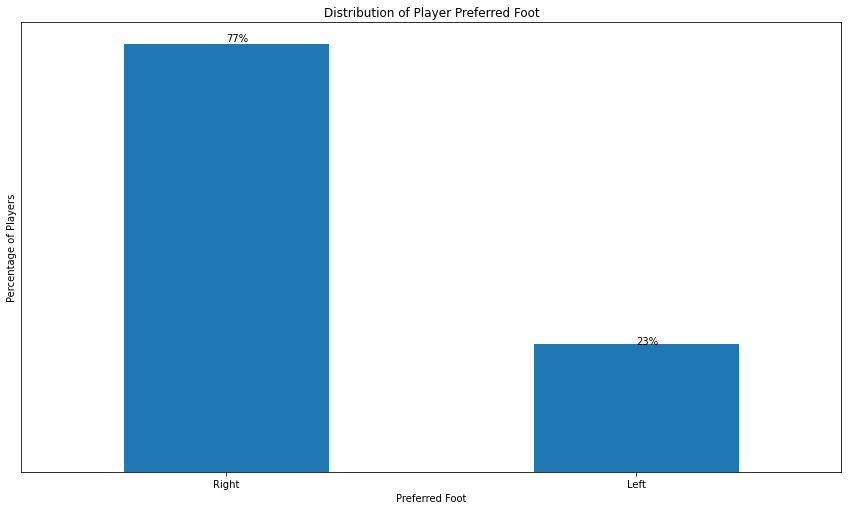

In [64]:
# Distribution of the players preferred foot
default_color = sb.color_palette()[0]
plt.figure(figsize=[14.70, 8.27])
ax = plt.subplot(1, 1, 1)
fifa_sub['Preferred Foot'].value_counts(normalize = True).plot.bar(rot=0)
for p in ax.patches:
    ax.annotate(str(int(100*round(p.get_height(),2)))+"%", (p.get_x()+p.get_width()/2, p.get_height() * 1.005))
plt.yticks([])
plt.ylabel("Percentage of Players")
plt.xlabel("Preferred Foot")
plt.title("Distribution of Player Preferred Foot");

In [65]:
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

fifa_sub['log_Value'] = fifa_sub['Value'].apply(log_trans)
fifa_sub['log_Wage'] = fifa_sub['Wage'].apply(log_trans)

## Player Value vs. Age

Plotting the palyer value vs. age shows that, generally, young players have low value. As the player gets older, his value increases until around the age of 30. Beyond 30, the value of the player starts to decrease as he gets older. There are some famous exeptions of players that are older than 30 and have very high value : Messi, Ronaldo, ......

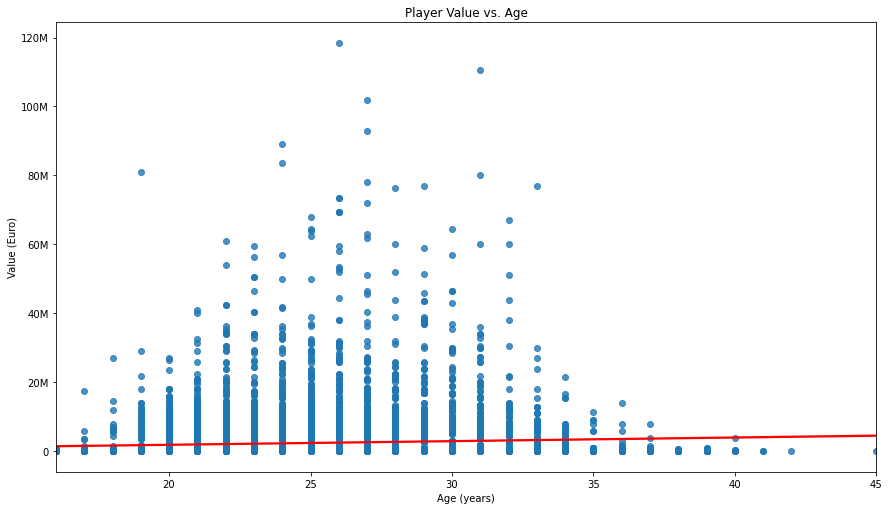

In [66]:
plt.figure(figsize=[14.70, 8.27])
sb.regplot(data = fifa_sub, x='Age', y="Value", line_kws = {"color":"red"})
plt.xlabel('Age (years)')
plt.ylabel('Value (Euro)')
plt.yticks([0,20000, 40000, 60000, 80000, 100000, 120000],['0','20M','40M','60M','80M','100M','120M'])
plt.title("Player Value vs. Age");


## Player Value vs. Overall Score

Plotting player's value on a logarithmic scale vs. the overall score of the player produces an approximately linear relationship.


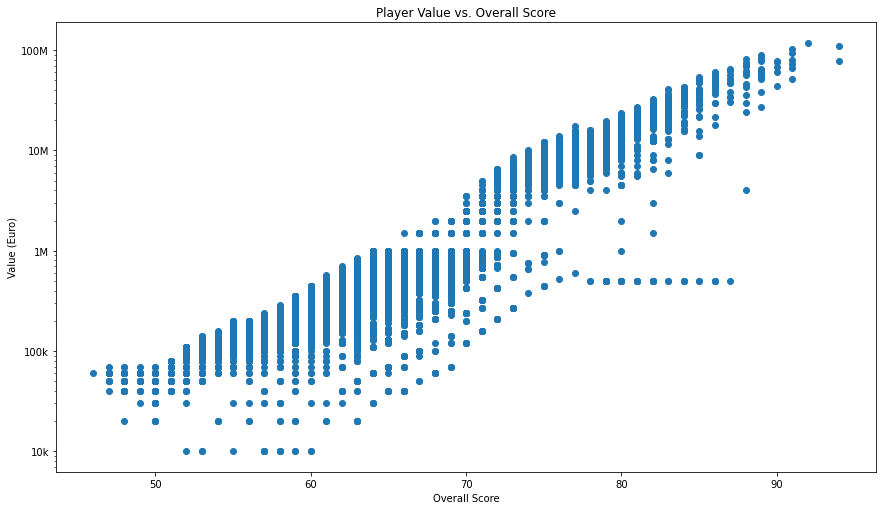

In [67]:
plt.figure(figsize=[14.70, 8.27])
plt.scatter(data = fifa_sub, x='Overall', y="Value")
plt.xlabel('Overall Score')
plt.ylabel('Value (Euro)')
plt.yscale("log")
plt.yticks([10,100,1000,10000,100000],['10k','100k','1M','10M','100M'])
plt.title("Player Value vs. Overall Score");


## Player Value vs. Weekly Wage

Plotting players' value on a logarithmic scale vs. the weekly wages shows an interseting relationship. All players with high wages have high value in the market, which makes sense. However, many players of high market value (> €10M) recieve low wages (< €100K), this may be because they have strong abilities and skills but they play for clubs with limited financial resources or maybe because some clubs overpay their players in comparison to other clubs. We need to investigate that more.

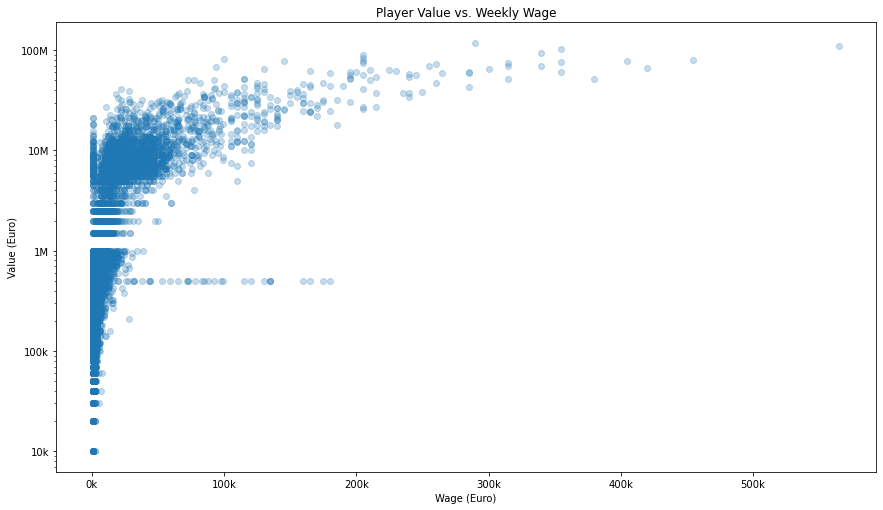

In [68]:
plt.figure(figsize=[14.70, 8.27])
plt.scatter(data = fifa_sub, x='Wage', y="Value", alpha =1/4)
plt.xlabel('Wage (Euro)')
plt.ylabel('Value (Euro)')
plt.yscale("log")
plt.title('Player Value vs. Weekly Wage')
plt.yticks([10,100,1e3,1e4,1e5],['10k','100k','1M','10M','100M'])
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%dk'))


## 10 Highest Wage paying Clubs



When it comes to the top 5 teams which pay the highest wages to their player, at the top of the list are two Spanish teams (Real Madrid and FC Barcelona), followed by two English teams (Manchester City and Manchester United) and in the fifth palce comes an Italian team (Juventus).

However, when it comes to the overall score of the palyers within each team, the Italian teams dominate the top 5 spots of teams with the highest average overall score. The first three teams in the list are Italian teams (Juventus, Napoli and Inter), followed by one Spanish team (Real Madrid) and then another Italian team (Milan).

The plot of the clubs paying the highest wages vs. the plot of the clubs with the highest overall score players show that some clubs are not paying their money wisely!!



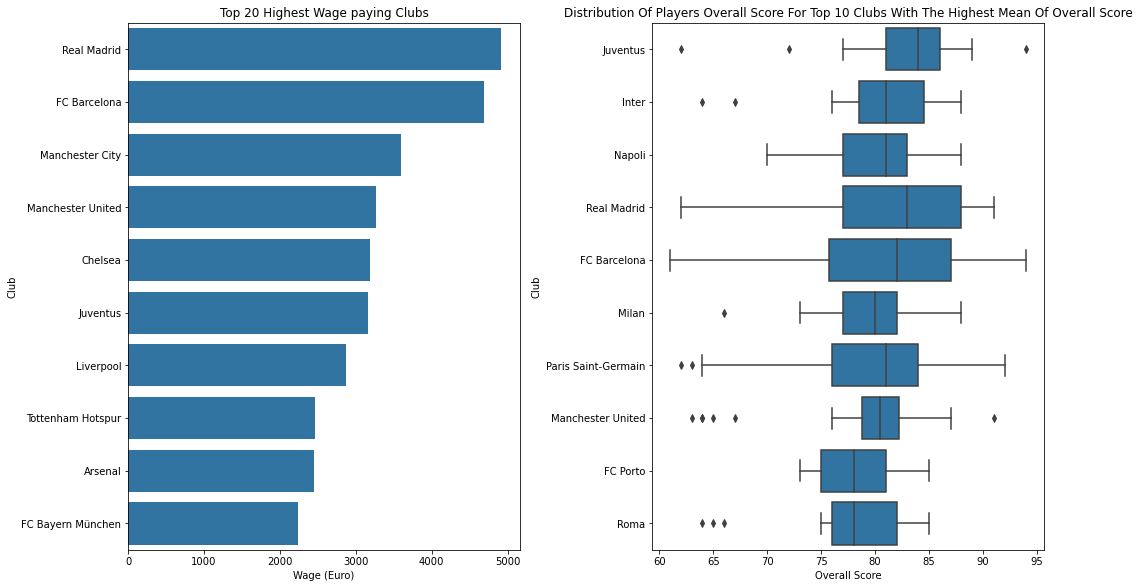

In [69]:
#fig, ax = plt.subplots(ncols = 2, nrows = 1 , figsize = [14.70, 8.27])
fifa_club_wage = fifa_sub.groupby(['Club'], sort=True)['Wage'].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=[14.70, 8.27])
plt.subplot(1, 2, 1)
sb.barplot(y=fifa_club_wage.index, x=fifa_club_wage, color = default_color)
#ax[0].title.set_text('Top 20 Highest Wage paying Clubs')
plt.xlabel("Wage (Euro)")
plt.title('Top 20 Highest Wage paying Clubs')
fifa_club_overall = fifa_sub.groupby(['Club'], sort=True)['Overall'].mean().sort_values(ascending=False)[:10]
plt.subplot(1, 2, 2)
sb.boxplot(y=fifa_sub["Club"], x=fifa_sub["Overall"], order =fifa_sub.groupby(['Club'], sort=True)['Overall'].mean().sort_values(ascending=False)[:10].index ,color = default_color);
#ax[1].title.set_text("Distribution of Players Overall Score for Top 20 Clubs with the Highest mean of Overall Score".title())
plt.title("Distribution of Players Overall Score for Top 10 Clubs with the Highest mean of Overall Score".title())
plt.xlabel("Overall Score")
plt.tight_layout();

In [70]:
# Create a dataframe with players of FC Barcelona and Juventus
df = fifa_sub[(fifa_sub["Club"]=="FC Barcelona")| (fifa_sub["Club"]=="Juventus")]
position_order = df.Position.unique()

## Player Value by Weekly Wage for two Clubs (FC Barcelona and Juventus)

The range of wages in Juventus is narrow when compared to that in Barcelona. Most wages in Juventus are <= 200k. However, in Barcelona, there is a wider range of wages. Therefore, players of the same market value recieve more wages in Barcelona than in Juventus.

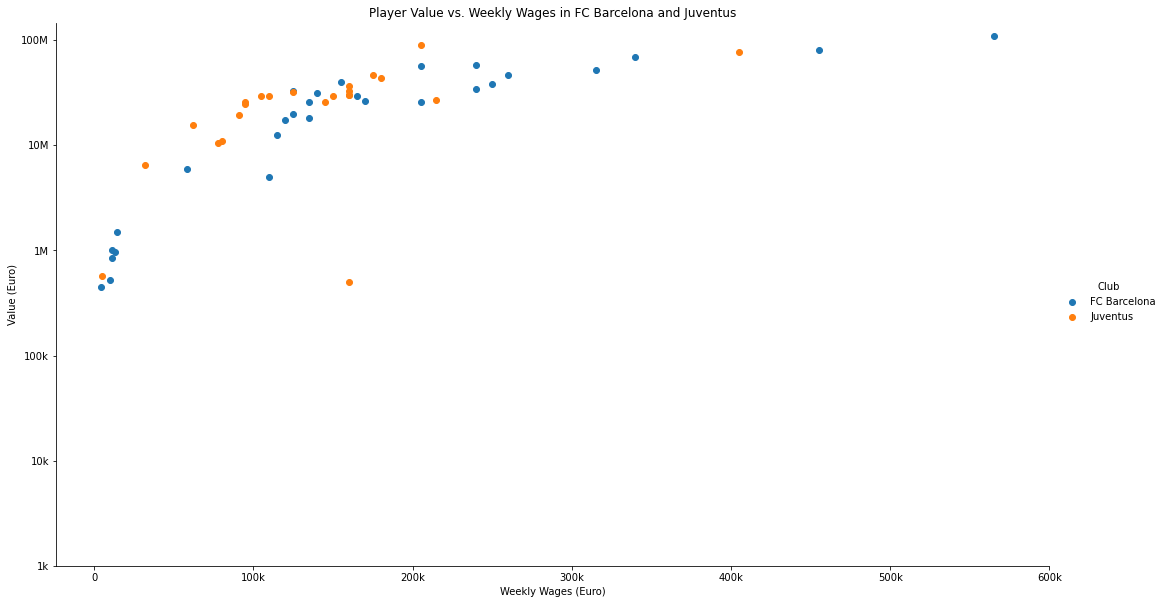

In [71]:
# Create facet scatter plots to show the relation between the value and wages of players of the two clubs
g = sb.FacetGrid(data = df, hue = 'Club',height = 8.27,  aspect = 14.70/8.27)
g.map(plt.scatter, 'Wage', 'log_Value')
g.add_legend()
plt.ylabel("Value (Euro)")
plt.xlabel("Weekly Wages (Euro)")
plt.title("Player Value vs. Weekly Wages in FC Barcelona and Juventus")
plt.ylim(log_trans(0,5))
plt.yticks(log_trans(np.array([1, 10, 100, 1e3, 1e4, 1e5])), ['1k', '10k', '100k', '1M','10M', '100M']);
plt.xticks(np.arange(0,700,100), ['0', '100k', '200k', '300k','400k','500k','600k']);

In [72]:
# function to plot the heatmap of values between preferref foot and position of the palyer
def plot_heatmap_fun (club):
    t = df[df["Club"]== club]
    temp= t.groupby(['Preferred Foot', 'Position']).mean()['Value']
    temp= temp.reset_index(name = 'value_avg')
    temp= temp.pivot(index = 'Position', columns = 'Preferred Foot',values = 'value_avg')
    
    sb.heatmap(temp, annot = True, fmt = '.0f',cbar_kws = {'label' : 'mean(Value)/1000 (Euro)'} , cmap = "vlag")
    

## Player Value by Position, Peferred Foot for two Clubs (FC Barcelona and Juventus)

 The two clubs have very different distributions when it comes to the average value of leftfooted and rightfooted palyers in different positions.

> In FC Barcelona, the three highest average values are for leftfooted RFs, rightfooted RSs and rightfooted LWs.

>In Juventus, the three highest average values are for leftfooted LFs, rightfooted CDMs and Leftfooted LMs.


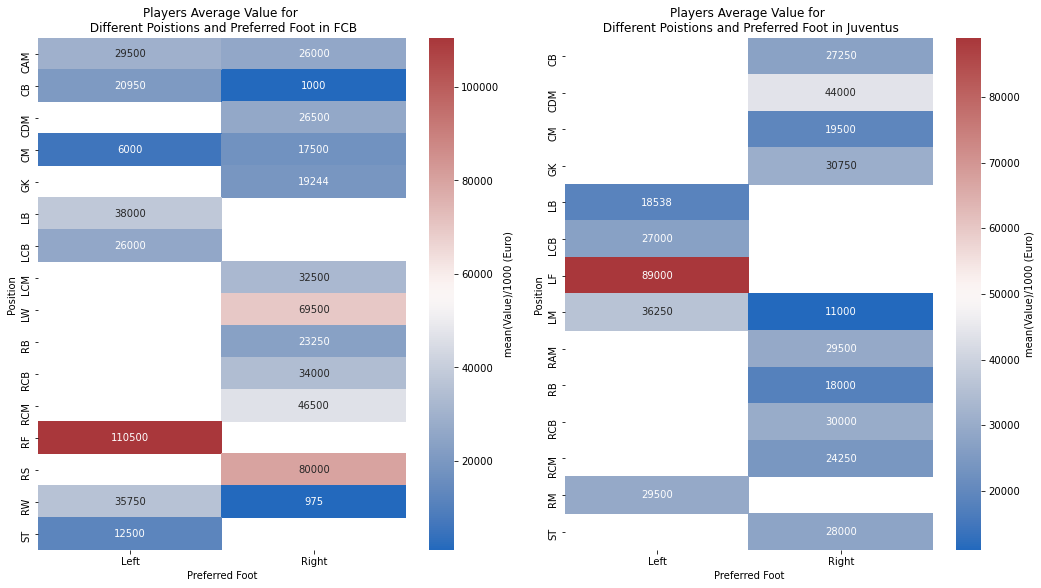

In [73]:
plt.figure(figsize=[14.70, 8.27])
plt.subplot(1, 2, 1)
plot_heatmap_fun ("FC Barcelona")
plt.title("Players Average Value for \n Different Poistions and Preferred Foot in FCB")
plt.subplot(1, 2, 2)
plot_heatmap_fun ("Juventus")
plt.title("Players Average Value for \n Different Poistions and Preferred Foot in Juventus")
plt.tight_layout();